# 2020 India Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly_express as px
import seaborn as sns

import warnings
warnings.simplefilter('ignore')
import statsmodels.formula.api as smf

## Things Explored in this Analysis
- initial exploration of cleaned datasets for happiness and cases in India
- different methods of visualizing happiness vs. cases data (daily, weekly, monthly, interpolated)

## Load cleaned csv's into df

In [2]:
india_hap_filter = pd.read_csv('../data/cleaned_data/2020/india_hap_cleaned.csv')
india_cov=pd.read_csv('../data/cleaned_data/2020/india_covid.csv')

## Initial investigation of cleaned subsets

In [3]:
india_hap_filter

,Unnamed: 0,date,week,mental_health_condition,age,gender,happiness_rating
0,4004,2020-04-30,week 5,No,34,Female,5.0
1,4005,2020-04-30,week 5,No,31,Female,5.0
2,4006,2020-04-30,week 5,No,27,Female,8.0
3,4007,2020-04-30,week 5,No,28,Female,5.0
4,4008,2020-04-30,week 5,No,30,Male,8.0
...,...,...,...,...,...,...,...
12136,16140,2020-09-20,week 16,No,55,Female,8.0
12137,16141,2020-09-20,week 16,No,48,Female,8.0
12138,16142,2020-09-20,week 16,No,50,Female,3.0
12139,16143,2020-09-20,week 16,No,51,Female,10.0


<AxesSubplot:>

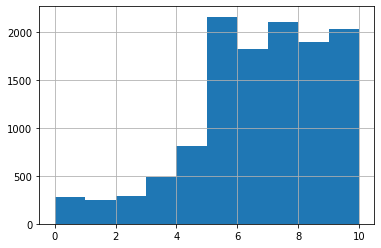

In [4]:
india_hap_filter['happiness_rating'].hist()

In [5]:
india_cov

,Unnamed: 0,Province/State,Country/Region,Lat,Long,date,cases
0,0,NaN,India,20.593684,78.96288,2020-01-22,0
1,1,NaN,India,20.593684,78.96288,2020-01-23,0
2,2,NaN,India,20.593684,78.96288,2020-01-24,0
3,3,NaN,India,20.593684,78.96288,2020-01-25,0
4,4,NaN,India,20.593684,78.96288,2020-01-26,0
...,...,...,...,...,...,...,...
312,312,NaN,India,20.593684,78.96288,2020-11-29,9431691
313,313,NaN,India,20.593684,78.96288,2020-11-30,9462809
314,314,NaN,India,20.593684,78.96288,2020-12-01,9499413
315,315,NaN,India,20.593684,78.96288,2020-12-02,9534964


In [6]:
india_cov = india_cov[['date','cases']]
india_cov

,date,cases
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0
...,...,...
312,2020-11-29,9431691
313,2020-11-30,9462809
314,2020-12-01,9499413
315,2020-12-02,9534964


In [7]:
india_cov.shape

(317, 2)

In [8]:
india_cov['cases'].describe()

count    3.170000e+02
mean     2.539056e+06
std      3.252640e+06
min      0.000000e+00
25%      7.598000e+03
50%      5.483180e+05
75%      5.020359e+06
max      9.571559e+06
Name: cases, dtype: float64

In [9]:
india_cov['date'] = pd.to_datetime(india_cov['date'])

## Group COVID-19 cases by date

Start off by looking at some general cases patterns in India

In [10]:
india_date_cov=india_cov.groupby('date').sum()
india_date_cov

,cases
date,
2020-01-22,0
2020-01-23,0
2020-01-24,0
2020-01-25,0
2020-01-26,0
...,...
2020-11-29,9431691
2020-11-30,9462809
2020-12-01,9499413


Text(0, 0.5, 'Cases')

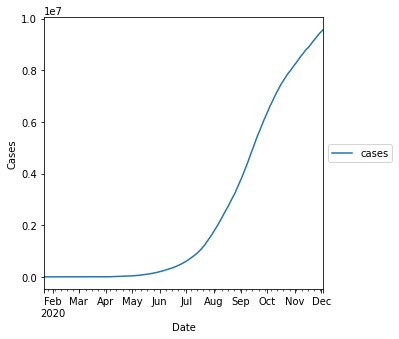

In [11]:
india_date_cov.plot(kind='line',figsize=(5,5))
plt.legend(loc= 'center left', bbox_to_anchor=(1.0,0.5))
plt.xlabel('Date')
plt.ylabel('Cases')

### Observations

Based on this plot, looks like India had a much later peak than some of the other countries I've look at so far. I wonder how the happiness ratings are going to look since India historically ranks relatively low on the ladder.

In [12]:
india_hap_filter['date'] = pd.to_datetime(india_hap_filter.date)
india_hap_filter['date'] = india_hap_filter['date'].dt.date

In [13]:
india_hap_filter['happiness_rating'] = india_hap_filter['happiness_rating'].astype(float)

## Group happiness ratings by date

In [14]:
india_hap_filter.groupby('date')['happiness_rating'].mean().reset_index()

,date,happiness_rating
0,2020-01-05,6.166667
1,2020-02-05,6.758065
2,2020-02-06,7.153846
3,2020-02-09,6.296199
4,2020-03-05,6.659091
...,...,...
60,2020-10-08,7.000000
61,2020-11-06,5.500000
62,2020-11-07,6.593750
63,2020-12-06,5.444444


## Calculating daily changes in COVID-19 cases count

In [15]:
india_date_cov['daily_change'] = india_date_cov['cases'].diff()
india_date_cov

,cases,daily_change
date,,
2020-01-22,0,NaN
2020-01-23,0,0.0
2020-01-24,0,0.0
2020-01-25,0,0.0
2020-01-26,0,0.0
...,...,...
2020-11-29,9431691,38772.0
2020-11-30,9462809,31118.0
2020-12-01,9499413,36604.0


In [16]:
india_date_cov.to_csv('../data/exported_subset_data/covid/covid_india.csv')

<AxesSubplot:xlabel='date'>

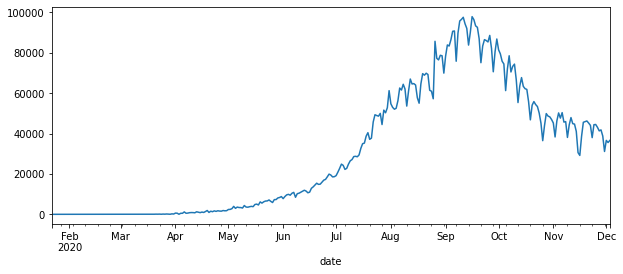

In [17]:
india_date_cov['daily_change'].plot(figsize=(10,4))

### Observations
This pattern of cases data is certiainly one not seen in Denmark, Finland, or the US. Appears to have been a much later surge in cases in India (Sept-Oct) and declining currently in December. Interested to see how happiness ratings have fluctuated.

In [18]:
india_df=india_hap_filter.groupby('date')['happiness_rating'].mean().reset_index()

In [19]:
india_df['date'] = pd.to_datetime(india_df['date'])

## Happiness ratings vs. COVID-19 daily case changes

<AxesSubplot:label='02c6b33a-54a5-4772-9277-574e9853aadb'>

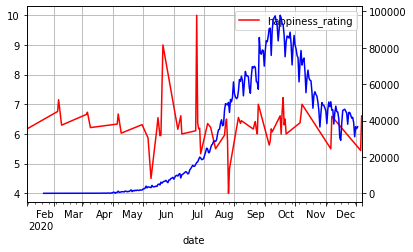

In [20]:
india_df.plot(x='date', y='happiness_rating', color='red',grid=True)

cov= india_date_cov.groupby('date')['daily_change'].sum()
cov.plot(x='date',y='daily_change', color='blue', grid=True, secondary_y=True)

### Observations
Spiky happiness ratings plot again-- inconsistent data available. Likely will need to do interpolated plot but first will attempt at monthly and maybe weekly plot

## Monthly COVID-19 and monthly happiness rating means

In [21]:
india_df['month_year'] = pd.to_datetime(india_df['date']).dt.to_period('M')

In [22]:
merged_df= pd.merge(left=india_df, left_on='date',
         right=india_date_cov, right_on='date')
merged_df

,date,happiness_rating,month_year,cases,daily_change
0,2020-02-05,6.758065,2020-02,3,0.0
1,2020-02-06,7.153846,2020-02,3,0.0
2,2020-02-09,6.296199,2020-02,3,0.0
3,2020-03-05,6.659091,2020-03,30,2.0
4,2020-03-06,6.732116,2020-03,31,1.0
...,...,...,...,...,...
57,2020-10-06,6.375973,2020-10,6757131,72049.0
58,2020-10-07,6.655738,2020-10,6835655,78524.0
59,2020-10-08,7.000000,2020-10,6906151,70496.0
60,2020-11-06,5.500000,2020-11,8462080,50356.0


<AxesSubplot:label='a52a0baf-0244-4a6b-8de4-6549f061f713'>

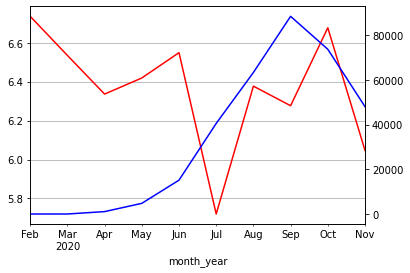

In [23]:
month_hap=merged_df.groupby('month_year')['happiness_rating'].mean()
month_hap.plot(color='red',grid=True)
month_cov=merged_df.groupby('month_year')['daily_change'].mean()
month_cov.plot(color='blue', grid=True, secondary_y=True)

## Observations
This is very interesting... it doesn't appear to have any correlations. There was a decrease in happiness rating monthly mean around June after cases began to increase, but after July, it doesn't follow the expected relationship.

## Weekly happiness ratings and weekly COVID-19

In [24]:
test=india_hap_filter.groupby('week')['happiness_rating'].mean()

In [25]:
india_cov['week_number'] = india_cov['date'].dt.week
india_cov

,date,cases,week_number
0,2020-01-22,0,4
1,2020-01-23,0,4
2,2020-01-24,0,4
3,2020-01-25,0,4
4,2020-01-26,0,4
...,...,...,...
312,2020-11-29,9431691,48
313,2020-11-30,9462809,49
314,2020-12-01,9499413,49
315,2020-12-02,9534964,49


In [26]:
weekly_covid= india_date_cov.rolling(3).mean()

<AxesSubplot:xlabel='date'>

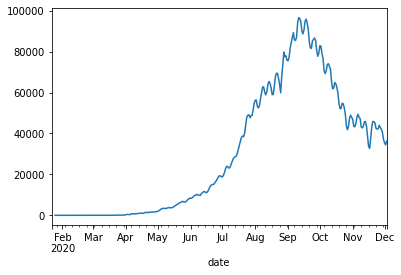

In [27]:
weekly_covid['daily_change'].plot()

In [28]:
india_df.set_index('date')
india_df = india_df.sort_index()

In [29]:
india_df['date'] = pd.to_datetime(india_df['date']) - pd.to_timedelta(7, unit='d')
india_df = india_df.groupby([pd.Grouper(key='date', freq='W-MON')])['happiness_rating'].mean().reset_index().sort_values('date')

In [30]:
india_df = india_df.dropna()

<AxesSubplot:label='285de9bd-793d-488c-9e2e-14710b132e17'>

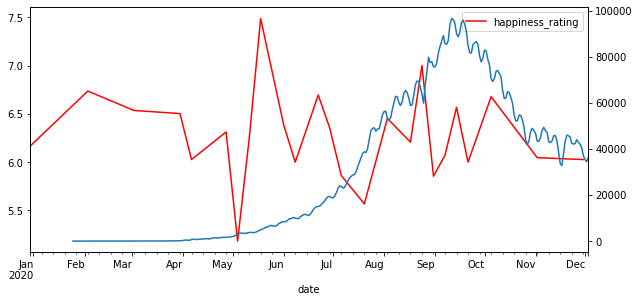

In [31]:
india_df.plot(x='date',y='happiness_rating',color='red',grid=True, figsize=(10,5))

weekly_covid['daily_change'].plot(secondary_y=True)

No clear correlations...at least with Denmark and Finland there were some instances of correlations for major surges/major dips in happiness, but that doesn't seem to be the case here.

## Interpolated Happiness Ratings

In [32]:
india_df_daily=india_df.set_index(pd.to_datetime(india_df['date']))

<AxesSubplot:xlabel='date'>

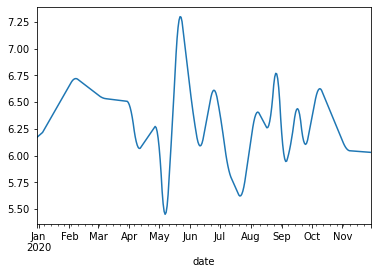

In [33]:
india_df_daily.resample('D').interpolate().rolling('7D')['happiness_rating'].mean().plot()


In [34]:
india_df_daily.to_csv('../data/exported_subset_data/happiness_2020/interpolated_india.csv')

<AxesSubplot:label='9497ecff-4d59-43f5-ad8f-0ab592565ae5'>

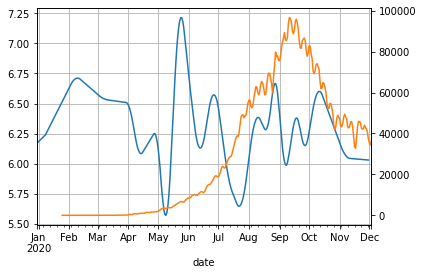

In [35]:
## resample, interpolate, rolling mean
## plot with weekly covid cases
india_df_daily.resample('D').interpolate().rolling('10D')['happiness_rating'].mean().plot()
weekly_covid['daily_change'].plot(grid=True, secondary_y=True)


### Observations
Interpolated provides more to work with (less spiky), but based on the graphs thus far, I'm inclined to say that there are no correlations between cases and happiness in India. Happiness baseline at the start of 2020 is also much higher than the typical mean (India historically ranks low on the Cantril ladder); strange anomalies this year it seems.

## Happiness rating mean for 2020 as a whole in India

In [36]:
india_hap_filter['happiness_rating'].mean()

6.317354418911128

### Observations
India's happiness rating was 3.25 in 2019. There was an increase in happiness ratings suprisingly (potentially due to the higher starting happiness rating and fluctuations, but an increase is unexpected).